# Does staying in school (and not working) prevent teen smoking and drinking? 

### [by Robert Jensen (2012) published in Journal of Health Economics](https://www.sciencedirect.com/science/article/pii/S0167629612000586#tbl0005)

## Abstract 

## Introduction 

The storng assosication between education and health behavior was shown in many papers. In this simulation study, the data from the above paper was genrated in order to predict the smoking and drinking amoung the youth. Author, by providing information on returns on schooling, has found increase in the schooling among male students in Dominican Republic in the first paper. Later he established that treated students smokes less at age 18 and start drinking later than their untreated peers.  

And students at randomly selected schools who were provided with information on the measured returns completed on average 0.20 years more schooling over the next 4 years than those who were not given this information. To the extent that this intervention affects drinking and smoking only through the impact on schooling (a point we discuss below), the random assignment in this experiment provides an exogenous shock to schooling, uncorrelated with omitted variables and with a clear direction of causality, with which to identify the relationship between schooling and alcohol and tobacco use.

## Data

The sample was drawn in two stages. First, from the 30 largest cities and towns (representing about two-thirds of the population), author chose 150 sampling clusters at random, with the number of clusters chosen in each city or town approximately proportional to its share of the combined population of the 30 cities/towns. For each of the 150 clusters, he selected the school where students from that cluster attend 8th grade, the final year of primary school. From each school he selected 15 boys at random from a list of all currently enrolled 8th grade students. All 2011 students were administered a survey between April and May 2001, close to the end of the academic year, gathering information on a variety of individual and household characteristics, as well as some simple questions on expected earnings by education.


A second survey was conducted shortly after the beginning of the next academic term (October 2001), with respondents interviewed again about perceived returns to education and current enrolment status, as well as health-related behaviors. A third round, follow-up survey was conducted in May and June of 2005, by which time students should have been finishing their last year of secondary school; for the approximately 120 students still enrolled in 2005 but not yet in their final year of school (due primarily to grade repetition), he conducted follow-ups for the next 2 years. He was able to re-interview 94% of youths in round 2 and 89% in round 3 (though for the educational outcomes, we were able to track students administratively even if we did not interview them, which reduced attrition to 3 and 9%, respectively). Attrition rates were very similar for treatment and control youths; in round 2, he was able to re-interview 1053 of the 1125 control students and 1057 of the 1125 treatment students, and in round 3, he was able to re-interview 1006 of the controls and 1005 of the treatment sample. 

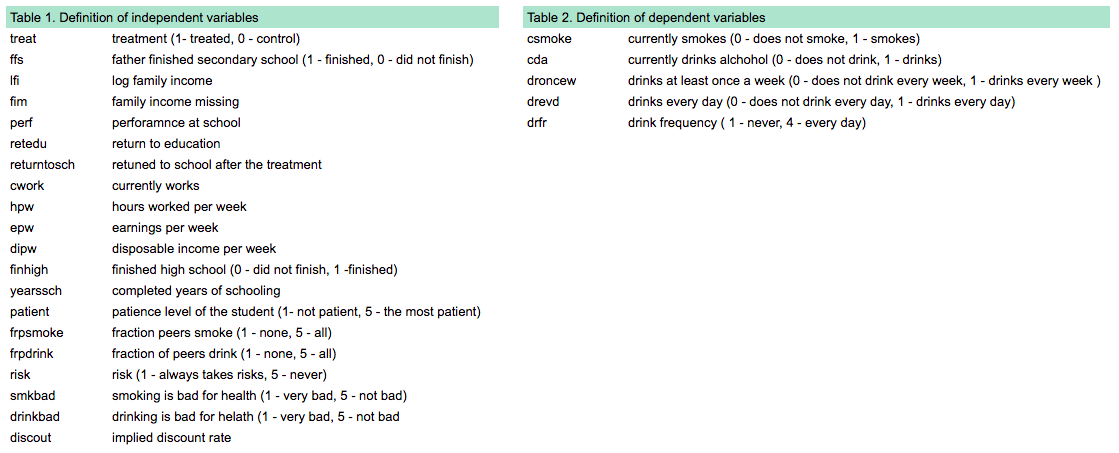

In [86]:
library(rpart)
library(rpart.plot)
library(ggplot2)
library(rsample)     
library(randomForest) 
library(ranger)       
library(caret)        
#library(h2o) 
library(e1071)
library(lattice)
library(fields)
library(ROCR)

randomForest 4.6-14
Type rfNews() to see new features/changes/bug fixes.

Attaching package: ‘randomForest’

The following object is masked from ‘package:ggplot2’:

    margin


Attaching package: ‘ranger’

The following object is masked from ‘package:randomForest’:

    importance

Loading required package: lattice
Loading required package: spam
Loading required package: dotCall64
Loading required package: grid
Spam version 2.5-1 (2019-12-12) is loaded.
Type 'help( Spam)' or 'demo( spam)' for a short introduction 
and overview of this package.
Help for individual functions is also obtained by adding the
suffix '.spam' to the function name, e.g. 'help( chol.spam)'.

Attaching package: ‘spam’

The following objects are masked from ‘package:base’:

    backsolve, forwardsolve

Loading required package: maps
See https://github.com/NCAR/Fields for
 an extensive vignette, other supplements and source code 


## Descriptive statistics 



In [42]:
source('auxiliary/dgp.r')

Only 5% of boys reported smoking in round 2, but this increases to 13% by round 3. By contrast, drinking alcohol is more widespread: in round 2, when most of the sample is 14 years old, 61% of boys already report drinking. Although that fraction rises only to 73% in round 3, the frequency of drinking increases substantially; the fraction reporting they drink every week increases from 19% to 46%, and the fraction reporting they drink every day increases from 2% to 13%.

In [43]:
head(X2)
head(Y2)

ffs,lfi,perf,age,returntosch,cwork2,hpw2,epw2,retedu,dipw2,treat,frpsmoke2,frpdrink2
did not finish,8.285575,2.6611037,14.26241,did not return,0,0.00000,0.0000,1076.51665,24.31420,control,3,3
did not finish,7.771632,1.8305584,14.46424,returned,0,0.00000,0.0000,654.39819,113.37227,treated,2,3
finished,8.199408,0.9441270,14.76718,did not return,0,0.00000,0.0000,50.50290,78.22083,treated,4,3
finished,8.104756,1.7994616,14.01695,returned,0,0.00000,0.0000,490.88627,45.23469,control,3,5
finished,8.287069,0.2294852,13.92087,returned,0,0.00000,0.0000,167.42613,104.77188,treated,4,4
did not finish,8.346203,1.9167416,15.05480,did not return,1,14.87033,305.5053,87.12567,61.97957,treated,2,4


csmoke2,cda2,droncew2,drevd2,drfr2
does not smoke,drinks,does not drink once a week,does not drink every day,2
does not smoke,does not drink,does not drink once a week,does not drink every day,1
does not smoke,drinks,does not drink once a week,does not drink every day,2
does not smoke,drinks,drinks once a week,does not drink every day,2
does not smoke,drinks,does not drink once a week,does not drink every day,2
does not smoke,drinks,drinks once a week,does not drink every day,3


For adults, moderate amounts of alcohol may not have adverse health consequences; the greater concern is over excessive or binge drinking. However, for the young adolescents we focus on, alcohol consumption may have important consequences in even smaller amounts, as noted in the introduction. And in particular, the analysis is focused primarily on daily drinking, which is likely to constitute a greater concern.

In [44]:
head(X3)
head(Y3)

ffs,lfi,perf,age,treat,finhigh,yearssch,cwork3,hpw3,epw3,dipw3,patient3,frpsmoke3,frpdrink3,risk,smkbad,drinkbad
did not finish,8.099241,0.9976378,13.44644,control,did not finish,9.106818,1,6.057529,110.4686,66.44402,4,3,5,1,4,3
did not finish,8.336193,-0.9378289,15.08430,control,did not finish,13.381548,0,0.000000,0.0000,36.23472,2,2,4,2,3,2
finished,7.956633,0.6808503,14.19341,treated,did not finish,11.128578,0,0.000000,0.0000,327.07328,1,3,4,3,4,2
did not finish,8.345638,3.8830172,14.89327,treated,finished,9.735914,0,0.000000,0.0000,681.29372,1,3,4,2,4,2
did not finish,8.289884,2.5972731,15.03465,control,did not finish,10.186027,0,0.000000,0.0000,172.84916,2,5,5,3,2,3
did not finish,8.046750,2.1513015,14.61654,control,did not finish,12.360446,0,0.000000,0.0000,55.69853,4,4,4,1,3,2


csmoke3,cda3,droncew3,drevd3,drfr3
smokes,drinks,drinks once a week,drinks every day,3
smokes,drinks,does not drink once a week,does not drink every day,4
does not smoke,does not drink,does not drink once a week,drinks every day,4
does not smoke,drinks,does not drink once a week,does not drink every day,3
smokes,drinks,drinks once a week,drinks every day,3
does not smoke,drinks,does not drink once a week,does not drink every day,2


As noted above, the survey gathered data on several of the mechanisms through which schooling and work may affect drinking and smoking: disposable income, patience, risk aversion, peer behavior and perceptions of harm associated with smoking and drinking. 

In [45]:
print('Structure of the independent variables in the second round')
str(X2)
print('Structure of the independent variables in the third round')
str(X3)

[1] "Structure of the independent variables in the second round"
'data.frame':	2011 obs. of  13 variables:
 $ ffs        : Factor w/ 2 levels "did not finish",..: 1 1 2 2 2 1 1 1 1 1 ...
 $ lfi        : num  8.29 7.77 8.2 8.1 8.29 ...
 $ perf       : num  2.661 1.831 0.944 1.799 0.229 ...
 $ age        : num  14.3 14.5 14.8 14 13.9 ...
 $ returntosch: Factor w/ 2 levels "did not return",..: 1 2 1 2 2 1 2 1 2 1 ...
 $ cwork2     : Factor w/ 2 levels "0","1": 1 1 1 1 1 2 1 1 1 1 ...
 $ hpw2       : num  0 0 0 0 0 ...
 $ epw2       : num  0 0 0 0 0 ...
 $ retedu     : num  1076.5 654.4 50.5 490.9 167.4 ...
 $ dipw2      : num  24.3 113.4 78.2 45.2 104.8 ...
 $ treat      : Factor w/ 2 levels "control","treated": 1 2 2 1 2 2 2 2 1 1 ...
 $ frpsmoke2  : Factor w/ 5 levels "1","2","3","4",..: 3 2 4 3 4 2 4 3 2 4 ...
 $ frpdrink2  : Factor w/ 5 levels "1","2","3","4",..: 3 3 3 5 4 4 4 2 4 4 ...
[1] "Structure of the independent variables in the third round"
'data.frame':	2011 obs. of  17 vari

In order to establish the commonly found relationship between education and health behaviors in data set, and for comparison with the experimental results, researcher starts by estimating least squares regressions of smoking and daily drinking on education and work status, using individuals in the control group only. For each outcome, he presents three separate regressions: first including years of school only, then only with an indicator for work status, and finally with both work and years of schooling, and his measures of possible mechanisms. All regressions also include the following baseline covariates: father's education, log of family income and teacher's reports of student performance in school.

The table below shows results of the OLS regressions of smoking and drinking on schooling and work in round 3 (control group only).

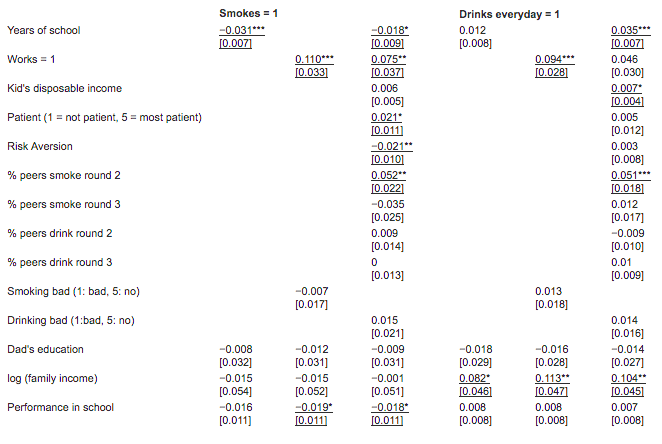

Researcher finds that education is associated with a lower likelihood of smoking, and that work results in a higher likelihood of smoking, and these effects are statistically significant when included individually or jointly. Education and work both appear to increase daily drinking – and the effect of education actually increases when we control for work status and for mechanisms. 

In [46]:
bplot.xy(X3.train$dipw3, X3.train$cda2)

ERROR: Error in split.default(y, cut(x, breaks)): первый аргумент должен быть вектором


## Method

## Results

##### Currently drinks round 2

In [390]:
  
funcrange <- function(N, mean, sd, lwr, upr, nnorm) {
  samp <- rnorm(nnorm, mean, sd)
  samp <- samp[samp >= lwr & samp <= upr]
  if (length(samp) >= N) {
    return(sample(samp, N))
  }  
  stop(simpleError("Try increasing nnorm."))
}

dgp.cda2 <- function(n){
    
########### Socioeconomic characteristics #######################

    vec<-c(rep(0,n*0.630035),rep(1, n*0.37))
    ffs<-sample(vec)
    lfi<- rnorm(n,mean=8.15, sd=0.3)
    perf<-abs(rnorm(n, mean=1.36, sd=1.32))
    age<-rnorm(n, mean=14.3, sd=0.79)
    retedu<-abs(rnorm(n, mean=272, sd=616))

################### outcomes round 2 ###########################

    vec1<-c(rep(0,n*0.42019),rep(1,n*0.58))
    returntosch<-sample(vec1)
    vec2<-c(rep(0,n*0.70015),rep(1,n*0.3))
    cwork2<-sample(vec2)
    hpw<-rnorm(n, mean=4.1, sd=8.9)
    hpw2<-hpw*cwork2
    epw<-abs(rnorm(n, mean=67.7, sd=172.6))
    epw2<-epw*cwork2
    dipw2<-abs(rnorm(n, mean=56.4, sd=71.1))
    vectreat<-c(rep(0, n*0.49), rep(1, n*0.5102))
    treat<-sample(vectreat)
    frpsmoke2<-funcrange(N=n, mean=2.68, sd=1.13, lwr=1, upr=5, nnorm=10000)
    frpdrink2<-funcrange(N=n, mean=3.32, sd=1.27, lwr=1, upr=5, nnorm=10000) 
    
    X1<-cbind(ffs, lfi, perf, age, returntosch, cwork2, hpw2, epw2, dipw2, treat,frpsmoke2, frpdrink2)
    
    beta<-c(-0.8, -1.5, 0.02, 0.37, -2.5, 0.07, 0.1, 0.1, 0.1, -1.5, 0.02, 0.7)
    eps<-rnorm(n, mean=0, sd=1)
    cda.2<-(exp(X1%*%beta+eps))/(1+exp(X1%*%beta+eps))
    cda2<-ifelse(cda.2<0.5, 'does not drink', 'drinks')
    
 return (data.frame(cda2,X1))
}


In [391]:
n=2011
cda2.data<-dgp.cda2(n)
head(cda2.data)


cda2,ffs,lfi,perf,age,returntosch,cwork2,hpw2,epw2,dipw2,treat,frpsmoke2,frpdrink2
does not drink,0,8.008984,2.0460352,14.73015,1,0,0.00000,0.0000,42.7873824,0,3.969235,1.148867
drinks,1,8.115249,0.6546799,13.80883,0,1,20.45984,129.6711,0.1965007,0,2.583637,4.113247
does not drink,1,8.273365,2.4775025,14.58700,1,0,0.00000,0.0000,7.4261913,1,2.052147,2.270972
does not drink,1,8.118778,1.1448459,13.71988,1,0,0.00000,0.0000,0.2685132,0,3.462128,3.640863
does not drink,0,8.203188,0.6173768,14.52374,1,0,0.00000,0.0000,81.4596668,1,2.171188,4.356383
drinks,0,8.393206,3.1538204,13.42216,0,0,0.00000,0.0000,63.6984181,0,2.678177,2.867378



Call:
 randomForest(formula = cda2.data$cda2 ~ ., data = cda2.data[-1],      proximity = T, importance = T, metric = "Accuracy", nodes = T) 
               Type of random forest: classification
                     Number of trees: 500
No. of variables tried at each split: 3

        OOB estimate of  error rate: 6.36%
Confusion matrix:
               does not drink drinks class.error
does not drink            739     69  0.08539604
drinks                     59   1144  0.04904406

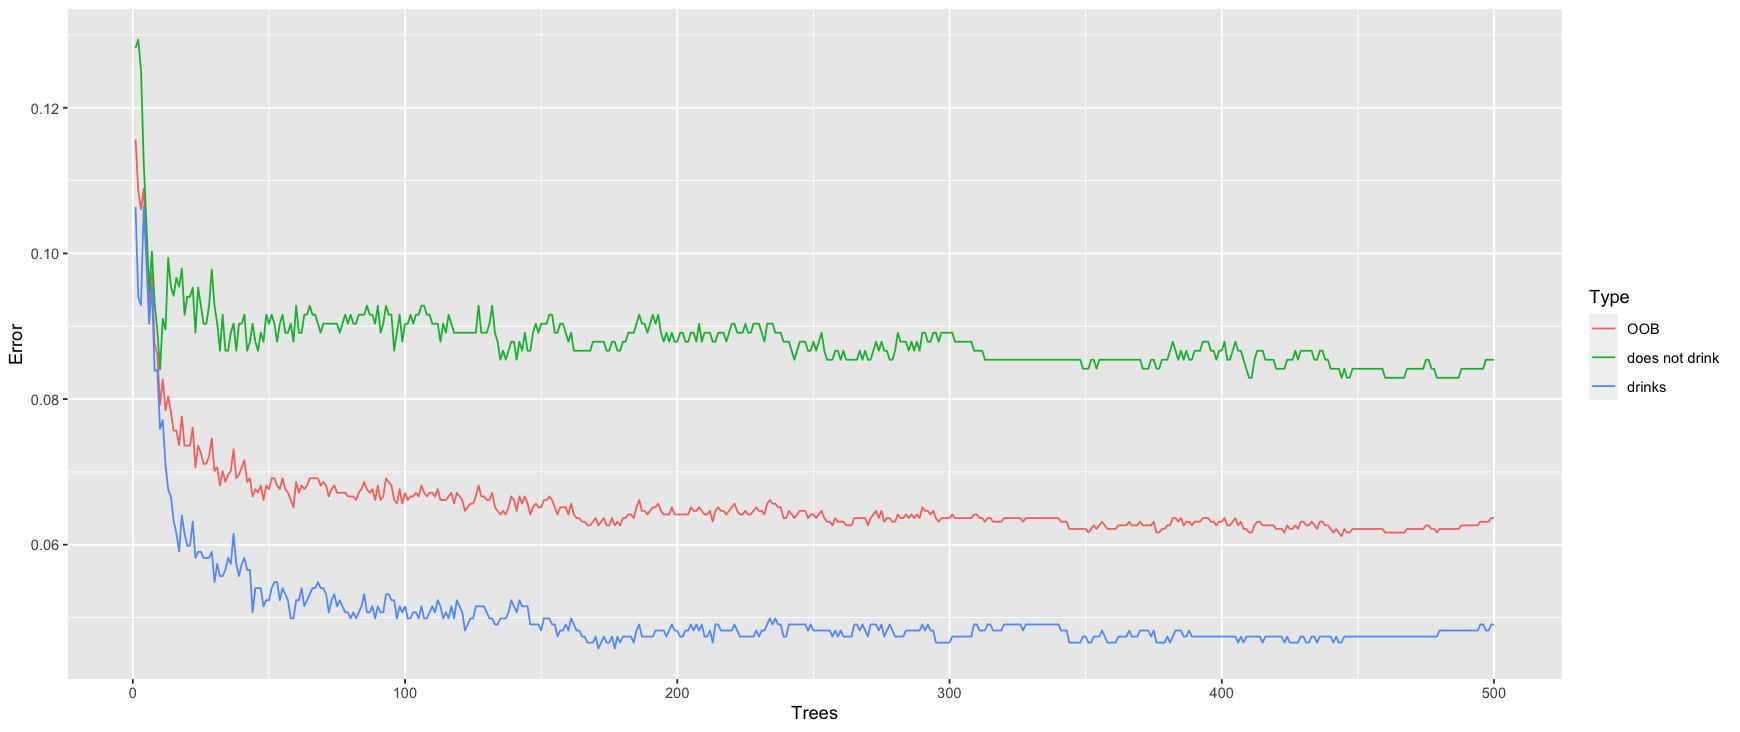

In [392]:
source('auxiliary/cda2.r')
rf.cda2
ggplot(data=oob.error.data, aes(x=Trees, y=Error)) + geom_line(aes(color=Type))
options(repr.plot.width=6, repr.plot.height=3)


Call:
 randomForest(formula = cda2.data$cda2 ~ ., data = cda2.data[-1],      proximity = T, ntree = 1000, importance = T, mtry = 4) 
               Type of random forest: classification
                     Number of trees: 1000
No. of variables tried at each split: 4

        OOB estimate of  error rate: 6.22%
Confusion matrix:
               does not drink drinks class.error
does not drink            738     70  0.08663366
drinks                     55   1148  0.04571904

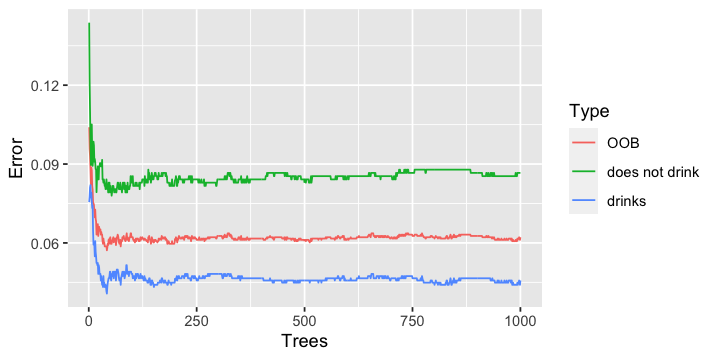

In [393]:
source('auxiliary/cda22.r')
rff.cda2

#To see if 1000 trees is enough for optimal classification, we can plot the error rates for ntree=1000
ggplot(data=oob.error.data, aes(x=Trees, y=Error)) + geom_line(aes(color=Type))
options(repr.plot.width=6, repr.plot.height=3)

adding more trees smoothes the error rate 

In [394]:
tuneRF(cda2.data, cda2.data$cda2)

mtry = 3  OOB error = 0% 
Searching left ...
mtry = 2 	OOB error = 0% 
NaN 0.05 


ERROR: Error in if (Improve > improve) {: пропущенное значение, а нужно TRUE/FALSE


[1] 0.07558429 0.06713078 0.06414719 0.06166087 0.06215813 0.06265540
 [7] 0.06066634 0.06265540 0.06016907 0.06166087 0.06315266 0.06166087

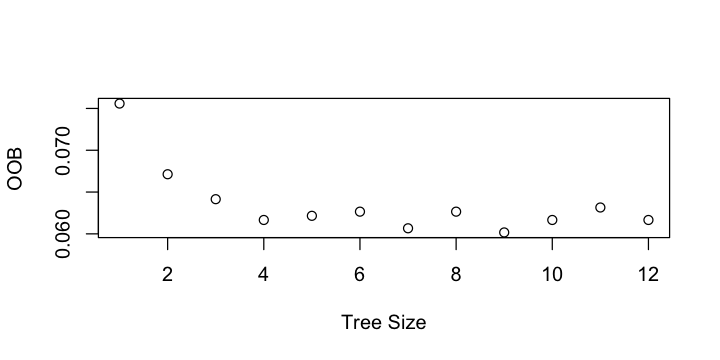

In [395]:
##now we need to make sure that I am considering the optimal number of variables at each internal node in the tree
oob.values<-vector(length=12)
for (i in 1:12) {
    temp.model<-randomForest(cda2.data$cda2~., data=cda2.data, mtry=i, ntree=1000)
    oob.values[i]<-temp.model$err.rate[nrow(temp.model$err.rate),1]
}
oob.values
plot(oob.values,
     xlab = "Tree Size", 
     ylab = "OOB")
options(repr.plot.width=3, repr.plot.height=3)

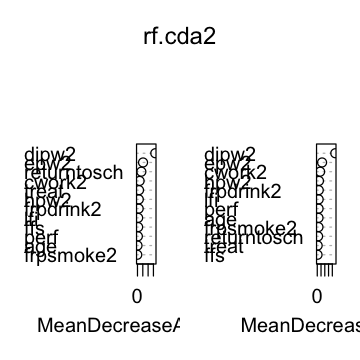

In [396]:
varImpPlot(rf.cda2)
options(repr.plot.width=14.5, repr.plot.height=6.1)

Higher the value of mean decrease accuracy or mean decrease gini score , higher the importance of the variable in the model

Mean Decrease Accuracy - How much the model accuracy decreases if we drop that variable.
Mean Decrease Gini - Measure of variable importance based on the Gini impurity index used for the calculation of splits in trees.

In [397]:
n=2011
cda2.test<-dgp.cda2(n)
rf.cda2.pred<-predict(rf.cda2, cda2.test)
confusionMatrix(rf.cda2.pred, cda2.test$cda2)

Confusion Matrix and Statistics

                Reference
Prediction       does not drink drinks
  does not drink            739     63
  drinks                     57   1152
                                          
               Accuracy : 0.9403          
                 95% CI : (0.9291, 0.9503)
    No Information Rate : 0.6042          
    P-Value [Acc > NIR] : <2e-16          
                                          
                  Kappa : 0.8754          
                                          
 Mcnemar's Test P-Value : 0.6481          
                                          
            Sensitivity : 0.9284          
            Specificity : 0.9481          
         Pos Pred Value : 0.9214          
         Neg Pred Value : 0.9529          
             Prevalence : 0.3958          
         Detection Rate : 0.3675          
   Detection Prevalence : 0.3988          
      Balanced Accuracy : 0.9383          
                                          
       

A performance instance
  'Area under the ROC curve'

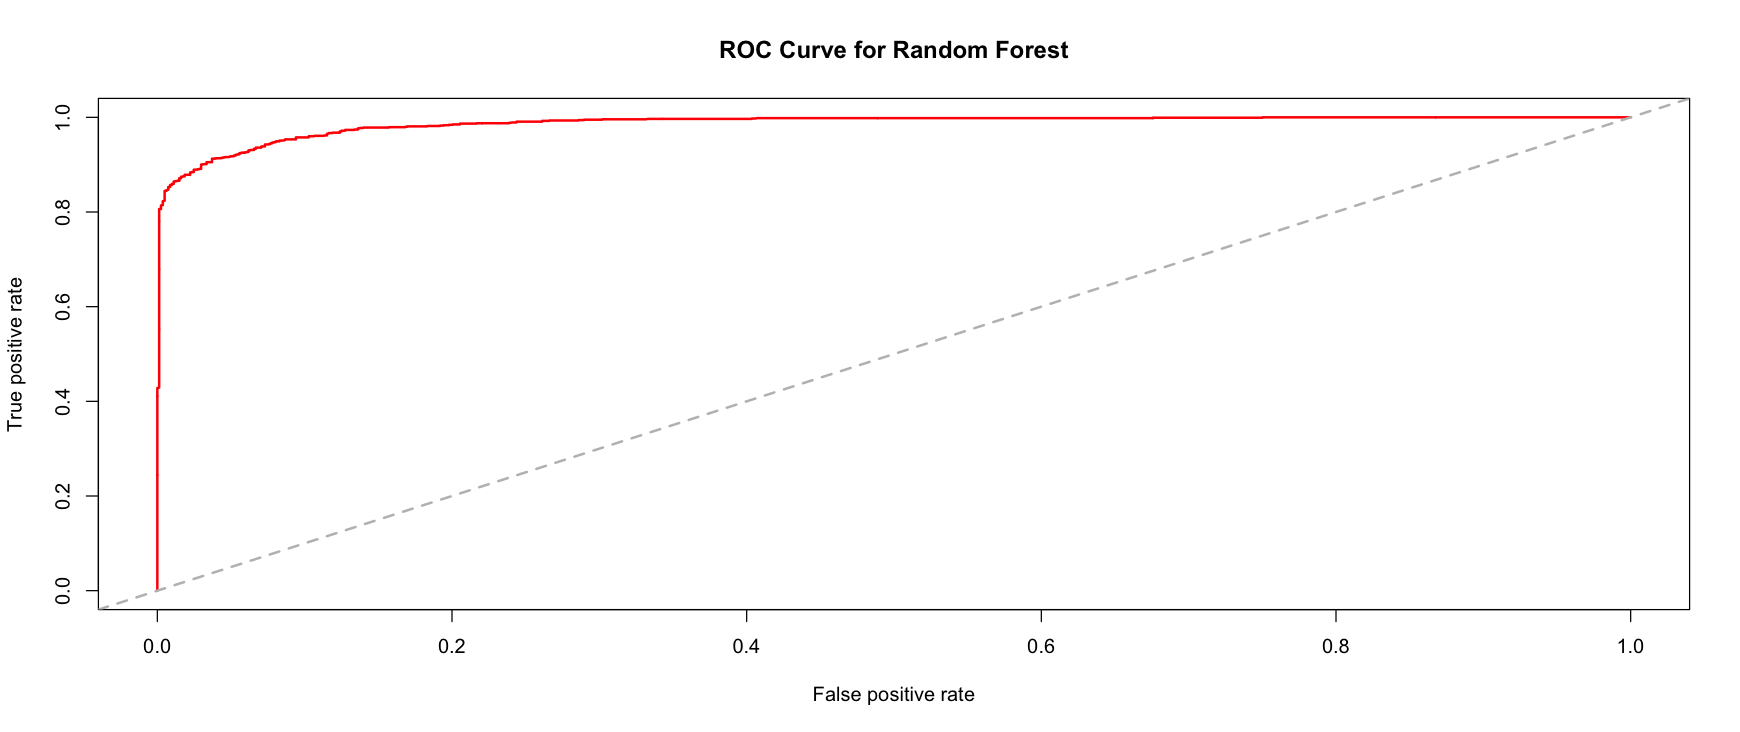

In [398]:
pred1=predict(rf.cda2,type = "prob")
perf = prediction(pred1[,2], cda2.data$cda2)
# 1. Area under curve
auc = performance(perf, "auc")
auc
# 2. True Positive and Negative Rate
pred3 = performance(perf, "tpr","fpr")
# 3. Plot the ROC curve
plot(pred3,main="ROC Curve for Random Forest",col=2,lwd=2)
abline(a=0,b=1,lwd=2,lty=2,col="gray")


## Currently drinks round 3

In [1]:
funcrange <- function(N, mean, sd, lwr, upr, nnorm) {
  samp <- rnorm(nnorm, mean, sd)
  samp <- samp[samp >= lwr & samp <= upr]
  if (length(samp) >= N) {
    return(sample(samp, N))
  }  
  stop(simpleError("Try increasing nnorm."))
}

dgp.cda3<-function(n){


################# outcomes round 3 #############################

    vec<-c(rep(0,n*0.630035),rep(1, n*0.37))
    ffs<-sample(vec)
    lfi<- rnorm(n,mean=8.15, sd=0.3)
    perf<-abs(rnorm(n, mean=1.36, sd=1.32))
    age<-rnorm(n, mean=17.3, sd=0.79)
    
    vectreat<-c(rep(0, n*0.49), rep(1, n*0.5102))
    treat<-sample(vectreat)
    vec7<-c(rep(0,n*0.68),rep(1,n*0.32024))
    finhigh<-sample(vec7)
    yearssch<-rnorm(n, mean=9.86, sd=1.77)
    vec8<-c(rep(0,n*0.64),rep(1,n*0.36002))
    cwork3<-sample(vec8)
    hpww<-abs(rnorm(n, mean=6, sd=11.6))
    hpw3<-hpww*cwork3
    epww<-abs(rnorm(n, mean=250.6, sd=833.4))
    epw3<-epww*cwork3
    dipw3<-abs(rnorm(n, mean=121.2, sd=391.6))
    patient3<-funcrange(N=n, mean=2.06, sd=1.14, lwr=1, upr=5, nnorm=10000)
    frpsmoke3<-funcrange(N=n, mean=3.31, sd=1.24, lwr=1, upr=5, nnorm=10000)
    frpdrink3<-funcrange(N=n, mean=4.48, sd=1, lwr=1, upr=5, nnorm=10000)
    risk<-funcrange(N=n, mean=1.98, sd=1.2, lwr=1, upr=5, nnorm=10000)
    smkbad<-funcrange(N=n, mean=3.67, sd=0.68, lwr=1, upr=5, nnorm=10000)
    drinkbad<-funcrange(N=n, mean=2.49, sd=0.63, lwr=1, upr=5, nnorm=10000) 
    
    X3<-cbind(ffs, lfi, perf, age, treat, finhigh, yearssch, cwork3, hpw3, epw3, dipw3, patient3, frpsmoke3, 
              frpdrink3, risk, smkbad, drinkbad )
    
    
    b<-c(-0.8, -0.9, -0.4, 0.37, -1.5, -1.1, -2.1, 0.11, 0.1, 0.12, 0.1, -0.05, 0.7, 1.7, 0.4, -0.15, -2.5)
    eps<-rnorm(n, mean=0, sd=1)
    cda.3<-(exp(X3%*%b+eps))/(1+exp(X3%*%b+eps))
    cda3<-ifelse(cda.3<0.5, 'does not drink', 'drinks')
    
    
 return (data.frame(cda3,X3))
}

In [2]:
#source('auxiliary/cda3.r')
n=2011
cda3.data<-dgp.cda3(n)
head(cda3.data)

cda3,ffs,lfi,perf,age,treat,finhigh,yearssch,cwork3,hpw3,epw3,dipw3,patient3,frpsmoke3,frpdrink3,risk,smkbad,drinkbad
drinks,0,7.930117,0.1496694,16.07721,1,0,9.160033,1,12.08193,428.7939,427.67447,2.581685,3.681072,3.416058,3.471580,3.952585,2.108021
does not drink,1,8.559142,0.5003815,17.16331,1,1,9.633932,0,0.00000,0.0000,97.02811,3.061966,4.439377,4.906310,2.213466,2.933628,2.098839
drinks,0,8.345890,2.7411948,17.17344,0,1,10.054003,1,11.38710,1428.4130,269.50985,1.839651,3.057572,4.520928,1.657340,2.590269,2.582032
drinks,0,8.023434,0.9695396,17.49757,0,1,9.533389,0,0.00000,0.0000,347.09538,3.313721,4.358463,4.726143,4.461328,3.888571,3.100525
drinks,0,8.387933,0.3931211,16.72913,1,0,11.976702,1,11.02562,872.4218,762.64523,1.170788,2.492560,4.904260,1.198931,4.679319,2.458994
does not drink,0,7.826053,2.6241961,16.26402,0,0,10.346869,0,0.00000,0.0000,92.76563,3.095801,2.530996,2.143585,1.996135,4.472343,2.042958


In [65]:
source('auxiliary/cda3.r')
rf.cda3


Call:
 randomForest(formula = cda3.data$cda3 ~ ., data = cda3.data,      proximity = T, importance = T) 
               Type of random forest: classification
                     Number of trees: 500
No. of variables tried at each split: 4

        OOB estimate of  error rate: 3.38%
Confusion matrix:
               does not drink drinks class.error
does not drink            468     38  0.07509881
drinks                     30   1475  0.01993355

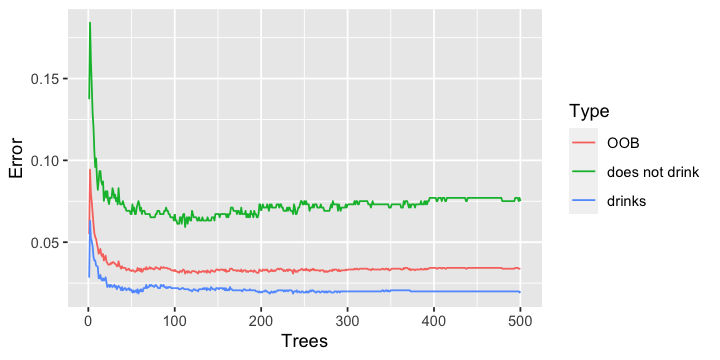

In [67]:
ggplot(data=oob.error.data31, aes(x=Trees, y=Error)) + geom_line(aes(color=Type))
options(repr.plot.width=6, repr.plot.height=2)


Call:
 randomForest(formula = cda3.data$cda3 ~ ., data = cda3.data[-1],      proximity = T, ntree = 1000, importance = T, mtry = 4) 
               Type of random forest: classification
                     Number of trees: 1000
No. of variables tried at each split: 4

        OOB estimate of  error rate: 3.23%
Confusion matrix:
               does not drink drinks class.error
does not drink            469     37  0.07312253
drinks                     28   1477  0.01860465

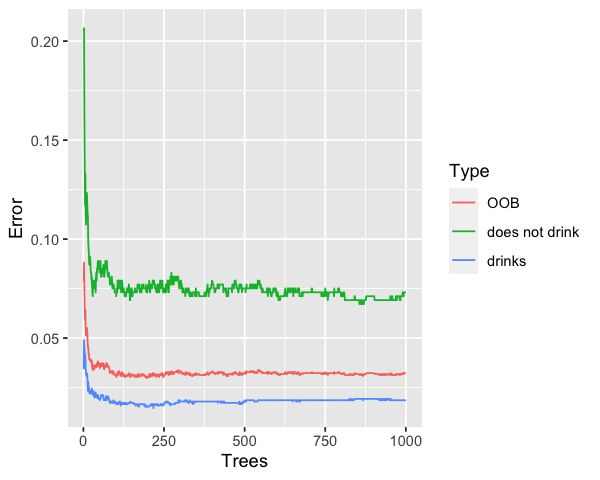

In [76]:
source('auxiliary/cda33.r')
rff.cda3

#To see if 1000 trees is enough for optimal classification, we can plot the error rates for ntree=1000
ggplot(data=oob.error.data, aes(x=Trees, y=Error)) + geom_line(aes(color=Type))
options(repr.plot.width=6, repr.plot.height=3)

[1] 0.21382397 0.04276479 0.03281949 0.03083043 0.02983590 0.02784684
 [7] 0.02983590 0.03083043 0.03033317 0.02983590 0.02884137 0.03182496
[13] 0.03132770 0.02983590 0.03132770 0.03281949 0.03232223

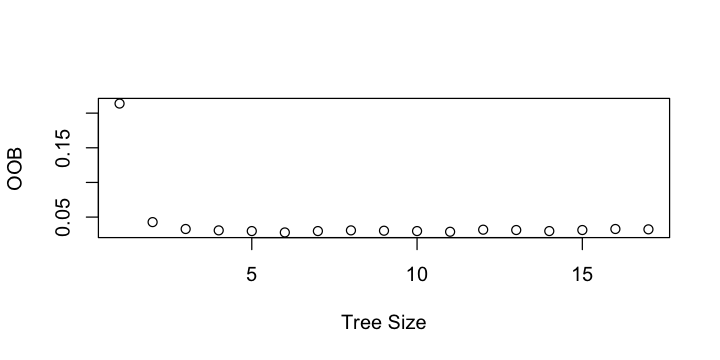

In [77]:
##now we need to make sure that I am considering the optimal number of variables at each internal node in the tree
oob.values<-vector(length=17)
for (i in 1:17) {
    temp.model<-randomForest(cda3.data$cda3~., data=cda3.data, mtry=i, ntree=1000)
    oob.values[i]<-temp.model$err.rate[nrow(temp.model$err.rate),1]
}
oob.values
plot(oob.values,
     xlab = "Tree Size", 
     ylab = "OOB")
options(repr.plot.width=5, repr.plot.height=4)

In [78]:
tuneRF(cda3.data, cda3.data$cda3, ntree=1000)

mtry = 4  OOB error = 0% 
Searching left ...
mtry = 2 	OOB error = 0.1% 
-Inf 0.05 
Searching right ...
mtry = 8 	OOB error = 0% 
NaN 0.05 


ERROR: Error in if (Improve > improve) {: пропущенное значение, а нужно TRUE/FALSE


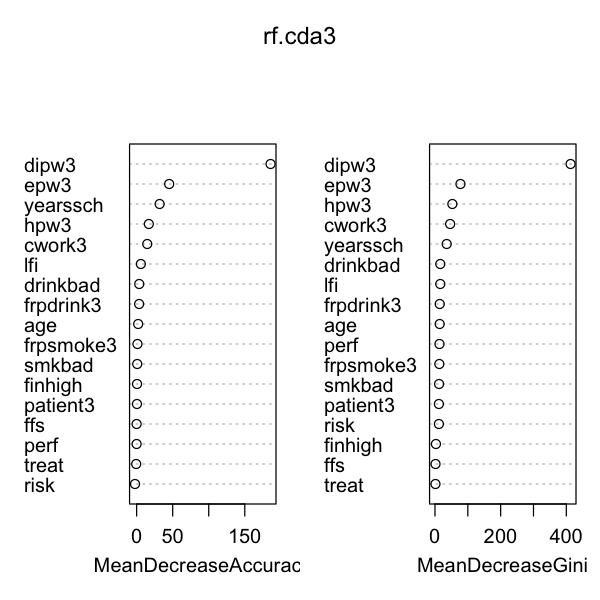

In [71]:
varImpPlot(rf.cda3)
options(repr.plot.width=14, repr.plot.height=6)

In [81]:
n=2011
cda3.test<-dgp.cda3(n)
rf.cda3.pred<-predict(rf.cda3, cda3.test)
confusionMatrix(rf.cda3.pred, cda3.test$cda3)

Confusion Matrix and Statistics

                Reference
Prediction       does not drink drinks
  does not drink            508     25
  drinks                     31   1447
                                         
               Accuracy : 0.9722         
                 95% CI : (0.964, 0.9789)
    No Information Rate : 0.732          
    P-Value [Acc > NIR] : <2e-16         
                                         
                  Kappa : 0.9288         
                                         
 Mcnemar's Test P-Value : 0.504          
                                         
            Sensitivity : 0.9425         
            Specificity : 0.9830         
         Pos Pred Value : 0.9531         
         Neg Pred Value : 0.9790         
             Prevalence : 0.2680         
         Detection Rate : 0.2526         
   Detection Prevalence : 0.2650         
      Balanced Accuracy : 0.9628         
                                         
       'Positive' Class : 

A performance instance
  'Area under the ROC curve'

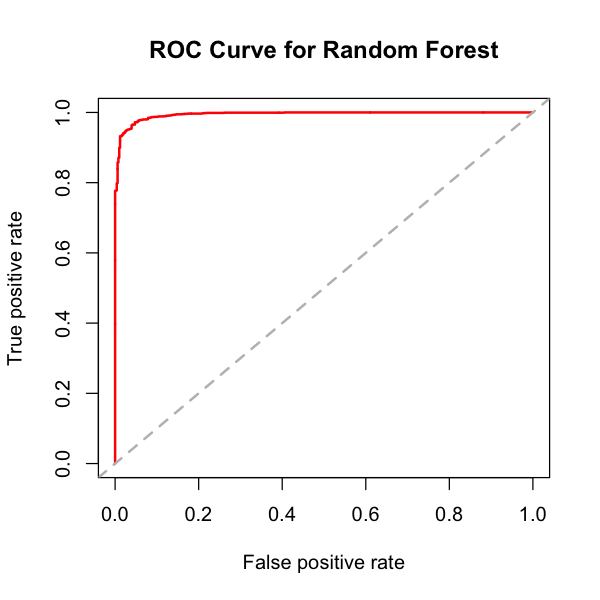

In [70]:
pred1=predict(rf.cda3,type = "prob")
perf = prediction(pred1[,2], cda3.data$cda3)
# 1. Area under curve
auc = performance(perf, "auc")
auc
# 2. True Positive and Negative Rate
pred3 = performance(perf, "tpr","fpr")
# 3. Plot the ROC curve
plot(pred3,main="ROC Curve for Random Forest",col=2,lwd=2)
abline(a=0,b=1,lwd=2,lty=2,col="gray")

##### Currently smokes round 2 

In [3]:
dgp.csmoke2<- function(n){  ###### round 2
    vec<-c(rep(0,n*0.630035),rep(1, n*0.37))
    ffs<-sample(vec)
    lfi<- rnorm(n,mean=8.15, sd=0.3)
    perf<-abs(rnorm(n, mean=1.36, sd=1.32))
    age<-rnorm(n, mean=14.3, sd=0.79)
    retedu<-abs(rnorm(n, mean=272, sd=616))
    
    vec1<-c(rep(0,n*0.42019),rep(1,n*0.58))
    returntosch<-sample(vec1)
    vec2<-c(rep(0,n*0.70015),rep(1,n*0.3))
    cwork2<-sample(vec2)
    hpw<-rnorm(n, mean=4.1, sd=8.9)
    hpw2<-hpw*cwork2
    epw<-abs(rnorm(n, mean=67.7, sd=172.6))
    epw2<-epw*cwork2
    dipw2<-abs(rnorm(n, mean=56.4, sd=71.1))
    vectreat<-c(rep(0, n*0.49), rep(1, n*0.5102))
    treat<-sample(vectreat)
    frpsmoke2<-funcrange(N=n, mean=2.68, sd=1.13, lwr=1, upr=5, nnorm=10000)
    frpdrink2<-funcrange(N=n, mean=3.32, sd=1.27, lwr=1, upr=5, nnorm=10000) 
    
    X.sm<-cbind(ffs, lfi, perf, age, returntosch, cwork2, hpw2, epw2, dipw2, treat,frpsmoke2, frpdrink2)
    
    beta<-c(-12, -15, -13.6, 0.25, -25.5, 0.3, 0.4, 0.5, 0.5, -24.5, 1.2, 0.02)
    eps<-rnorm(n, mean=0, sd=1)
    csmoke.2<-(exp(X.sm%*%beta+eps))/(1+exp(X.sm%*%beta+eps))
    csmoke2<-ifelse(csmoke.2<0.5, 'does not smoke', 'smokes')
    
    return (data.frame(csmoke2,X.sm))
}

In [4]:
#source('auxiliary/dgp.r')
n=2011
csmoke2.data<-dgp.csmoke2(n)


Call:
 randomForest(formula = csmoke2.data$csmoke2 ~ ., data = csmoke2.data[-1],      proximity = T, importance = T, ntree = 1000) 
               Type of random forest: classification
                     Number of trees: 1000
No. of variables tried at each split: 3

        OOB estimate of  error rate: 1.59%
Confusion matrix:
               does not smoke smokes class.error
does not smoke           1891      5 0.002637131
smokes                     27     88 0.234782609

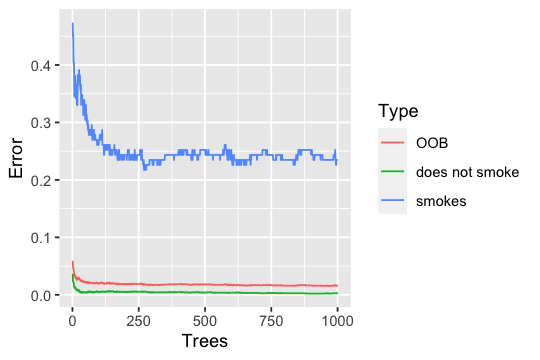

In [202]:
source('auxiliary/csmoke2.r')
rf.csmoke2
ggplot(data=oob.error.data, aes(x=Trees, y=Error)) + geom_line(aes(color=Type))
options(repr.plot.width=4.5, repr.plot.height=3)

In [203]:
tuneRF(csmoke2.data, csmoke2.data$csmoke2, ntree=1000)

mtry = 3  OOB error = 0% 
Searching left ...
mtry = 2 	OOB error = 0.1% 
-Inf 0.05 
Searching right ...
mtry = 6 	OOB error = 0% 
NaN 0.05 


ERROR: Error in if (Improve > improve) {: пропущенное значение, а нужно TRUE/FALSE


[1] 0.05619095 0.02187966 0.01640975 0.01640975 0.01591248 0.01690701
 [7] 0.01640975 0.01740428 0.01790154 0.01889607 0.01889607 0.02038787

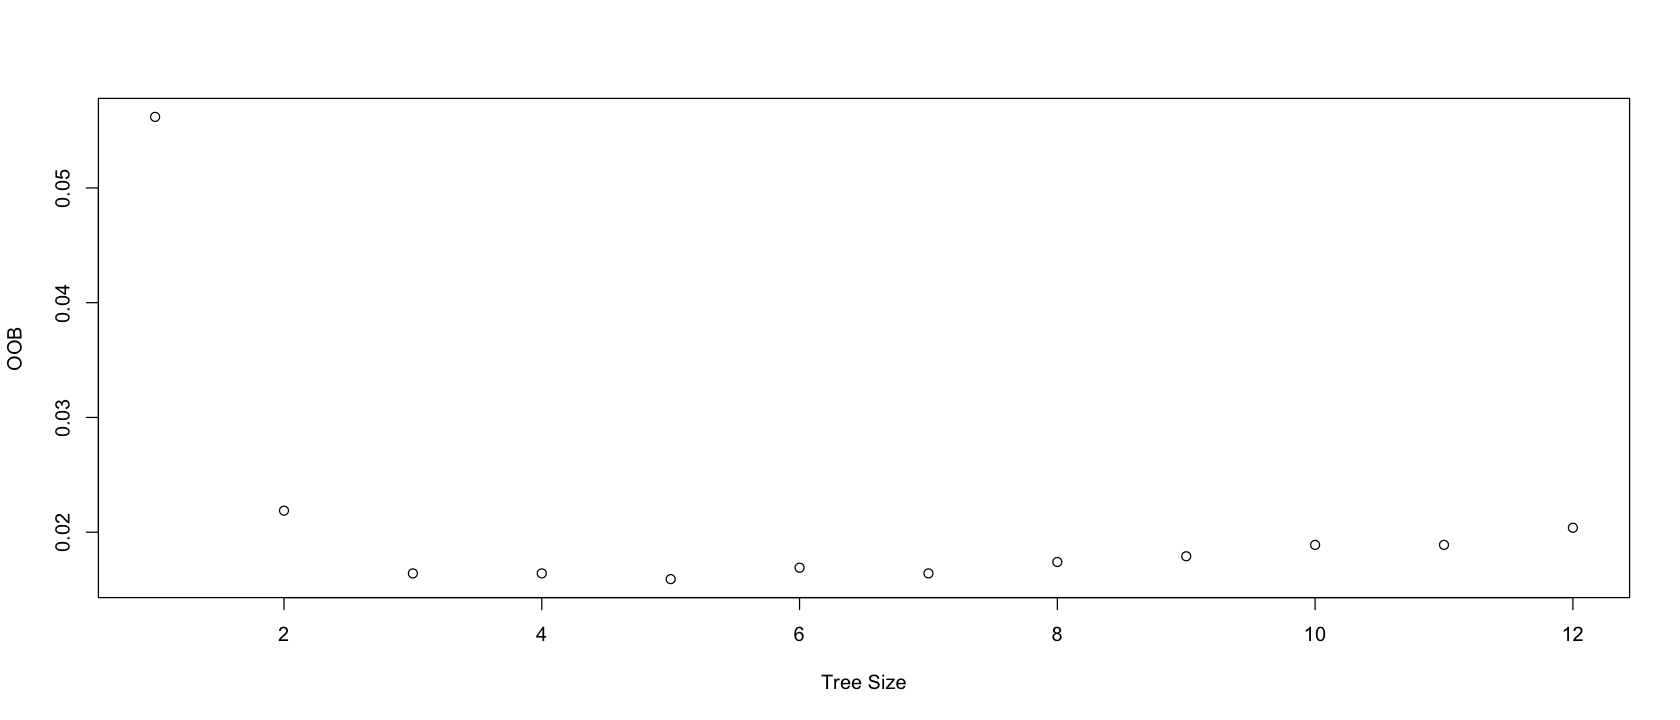

In [208]:
##now we need to make sure that I am considering the optimal number of variables at each internal node in the tree
oob.values<-vector(length=12)
for (i in 1:12) {
    temp.model<-randomForest(csmoke2.data$csmoke2~., data=csmoke2.data[-1], mtry=i, ntree=1000)
    oob.values[i]<-temp.model$err.rate[nrow(temp.model$err.rate),1]
}
oob.values
plot(oob.values,
     xlab = "Tree Size", 
     ylab = "OOB")
options(repr.plot.width=5, repr.plot.height=5)

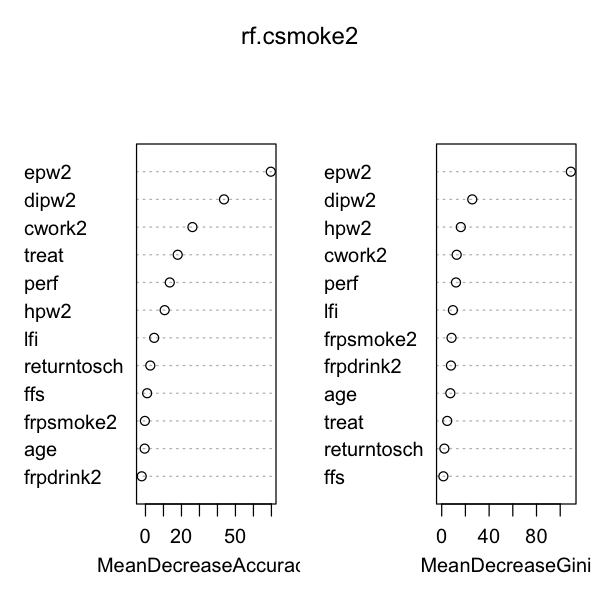

In [206]:
varImpPlot(rf.csmoke2)
options(repr.plot.width=14, repr.plot.height=6)

In [214]:
n=2011
csmoke2.test<-dgp.csmoke2(n)
rf.csmoke2.pred<-predict(rf.csmoke2, csmoke2.test)
confusionMatrix(rf.csmoke2.pred, csmoke2.test$csmoke2)

Confusion Matrix and Statistics

                Reference
Prediction       does not smoke smokes
  does not smoke           1883     35
  smokes                      8     85
                                          
               Accuracy : 0.9786          
                 95% CI : (0.9713, 0.9845)
    No Information Rate : 0.9403          
    P-Value [Acc > NIR] : < 2.2e-16       
                                          
                  Kappa : 0.787           
                                          
 Mcnemar's Test P-Value : 7.341e-05       
                                          
            Sensitivity : 0.9958          
            Specificity : 0.7083          
         Pos Pred Value : 0.9818          
         Neg Pred Value : 0.9140          
             Prevalence : 0.9403          
         Detection Rate : 0.9364          
   Detection Prevalence : 0.9538          
      Balanced Accuracy : 0.8521          
                                          
       

A performance instance
  'Area under the ROC curve'

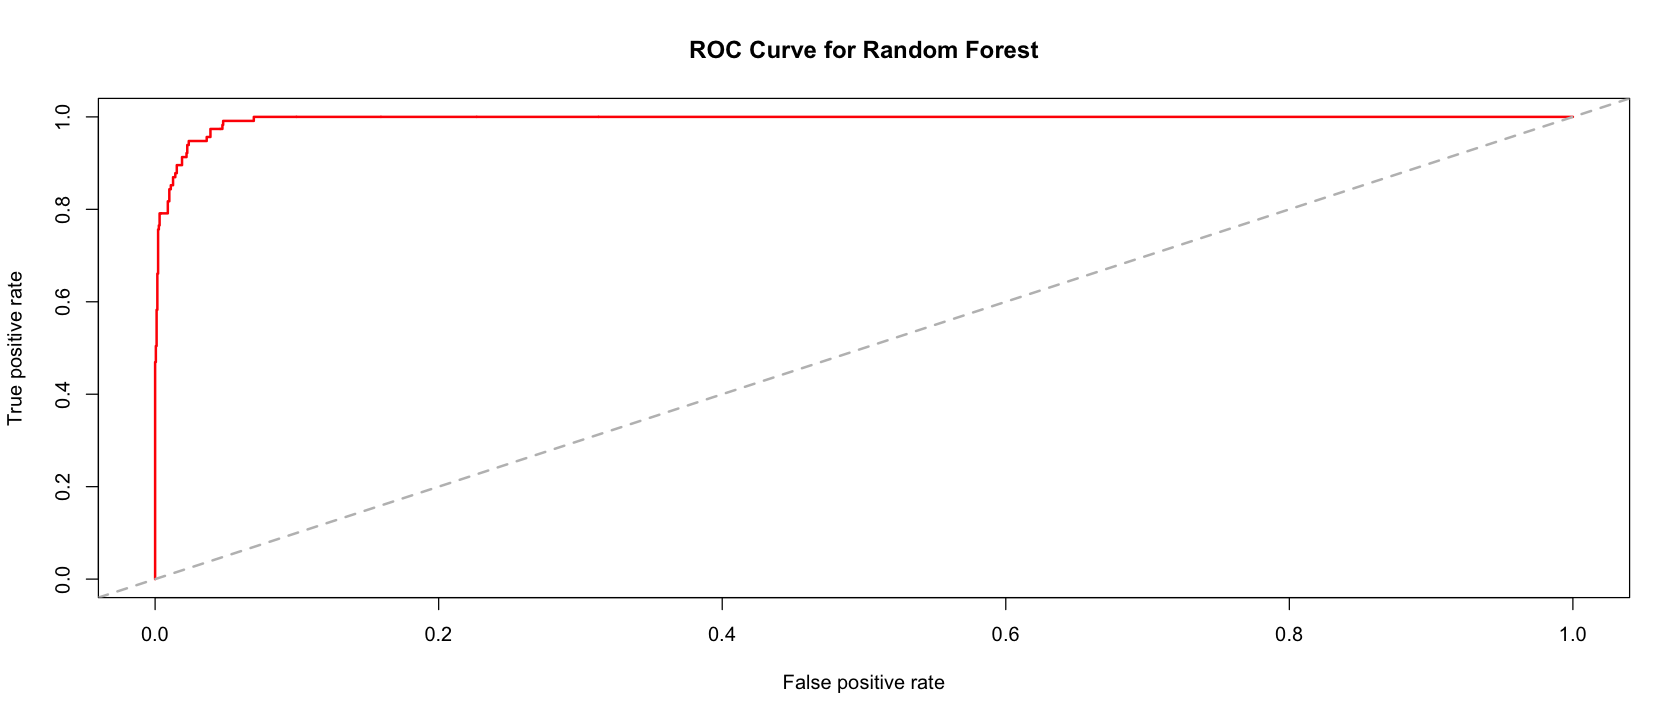

In [207]:
pred1=predict(rf.csmoke2,type = "prob")
perf = prediction(pred1[,2], csmoke2.data$csmoke2)
# 1. Area under curve
auc = performance(perf, "auc")
auc
# 2. True Positive and Negative Rate
pred3 = performance(perf, "tpr","fpr")
# 3. Plot the ROC curve
plot(pred3,main="ROC Curve for Random Forest",col=2,lwd=2)
abline(a=0,b=1,lwd=2,lty=2,col="gray")

##### Currently smokes round 3

In [83]:
funcrange <- function(N, mean, sd, lwr, upr, nnorm) {
  samp <- rnorm(nnorm, mean, sd)
  samp <- samp[samp >= lwr & samp <= upr]
  if (length(samp) >= N) {
    return(sample(samp, N))
  }  
  stop(simpleError("Try increasing nnorm."))
}

dgp.csmoke3<-function(n){    
   
    vec<-c(rep(0,n*0.630035),rep(1, n*0.37))
    ffs<-sample(vec)
    lfi<- rnorm(n,mean=8.15, sd=0.3)
    perf<-abs(rnorm(n, mean=1.36, sd=1.32))
    age<-rnorm(n, mean=17.3, sd=0.79)
    
    vectreat<-c(rep(0, n*0.49), rep(1, n*0.5102))
    treat<-sample(vectreat)
    vec7<-c(rep(0,n*0.68),rep(1,n*0.32024))
    finhigh<-sample(vec7)
    yearssch<-rnorm(n, mean=9.86, sd=1.77)
    vec8<-c(rep(0,n*0.64),rep(1,n*0.36002))
    cwork3<-sample(vec8)
    hpww<-abs(rnorm(n, mean=6, sd=11.6))
    hpw3<-hpww*cwork3
    epww<-abs(rnorm(n, mean=250.6, sd=833.4))
    epw3<-epww*cwork3
    dipw3<-abs(rnorm(n, mean=121.2, sd=391.6))
    patient3<-funcrange(N=n, mean=2.06, sd=1.14, lwr=1, upr=5, nnorm=10000)
    frpsmoke3<-funcrange(N=n, mean=3.31, sd=1.24, lwr=1, upr=5, nnorm=10000)
    frpdrink3<-funcrange(N=n, mean=4.48, sd=1, lwr=1, upr=5, nnorm=10000)
    risk<-funcrange(N=n, mean=1.98, sd=1.2, lwr=1, upr=5, nnorm=10000)
    smkbad<-funcrange(N=n, mean=3.67, sd=0.68, lwr=1, upr=5, nnorm=10000)
    drinkbad<-funcrange(N=n, mean=2.49, sd=0.63, lwr=1, upr=5, nnorm=10000) 
    
    Xsm3<-cbind(ffs, lfi, perf, age, treat, finhigh, yearssch, cwork3, hpw3, epw3, dipw3, patient3, frpsmoke3, 
              frpdrink3, risk, smkbad, drinkbad )
    
    
    
    b1<-c(-0.5, -0.4, -0.5, 0.18, -0.47, -0.21, -0.51, 0.011, 0.01, 0.02, 0.01, -0.35, 0.47, 0.4, 0.33, -0.92, -0.5)
    eps<-rnorm(n, mean=0, sd=1)
    csmoke.3<-(exp(Xsm3%*%b1+eps))/(1+exp(Xsm3%*%b1+eps))
    csmoke3<-ifelse(csmoke.3<0.5, 'does not smoke', 'smokes')
    
    
 return (data.frame(csmoke3,Xsm3))
}

In [84]:
n=2011
csmoke3.data<-dgp.csmoke3(n)
head(csmoke3.data)


csmoke3,ffs,lfi,perf,age,treat,finhigh,yearssch,cwork3,hpw3,epw3,dipw3,patient3,frpsmoke3,frpdrink3,risk,smkbad,drinkbad
smokes,0,7.858173,2.564195,19.00120,0,0,6.326573,1,4.511376,353.7645,592.2829,1.968365,2.718637,3.852357,1.905544,4.033499,3.504042
smokes,0,8.102748,1.362957,17.52562,0,0,10.260841,1,3.790345,334.3578,297.1065,3.013161,3.023917,3.362762,1.441965,2.348342,1.083881
does not smoke,0,8.976424,0.101017,16.76710,1,1,8.922668,0,0.000000,0.0000,498.7798,4.071643,2.999304,4.678183,1.904492,3.492660,2.089074
does not smoke,0,7.805241,1.971720,18.11413,1,0,7.166120,0,0.000000,0.0000,111.8235,3.588915,2.688911,3.375936,1.423607,4.177402,3.240343
does not smoke,0,8.408981,1.746653,18.34130,0,1,10.340802,0,0.000000,0.0000,505.6344,2.130470,3.313867,3.666836,2.736933,2.810067,2.151605
does not smoke,1,7.838575,2.746043,17.46601,1,0,10.218841,0,0.000000,0.0000,806.6481,3.867314,4.190753,3.643321,3.608210,3.896954,3.454524



Call:
 randomForest(formula = csmoke3.data$csmoke3 ~ ., data = csmoke3.data[-1],      proximity = T, importance = T, ntree = 1000) 
               Type of random forest: classification
                     Number of trees: 1000
No. of variables tried at each split: 4

        OOB estimate of  error rate: 4.77%
Confusion matrix:
               does not smoke smokes class.error
does not smoke           1281     39  0.02954545
smokes                     57    634  0.08248915

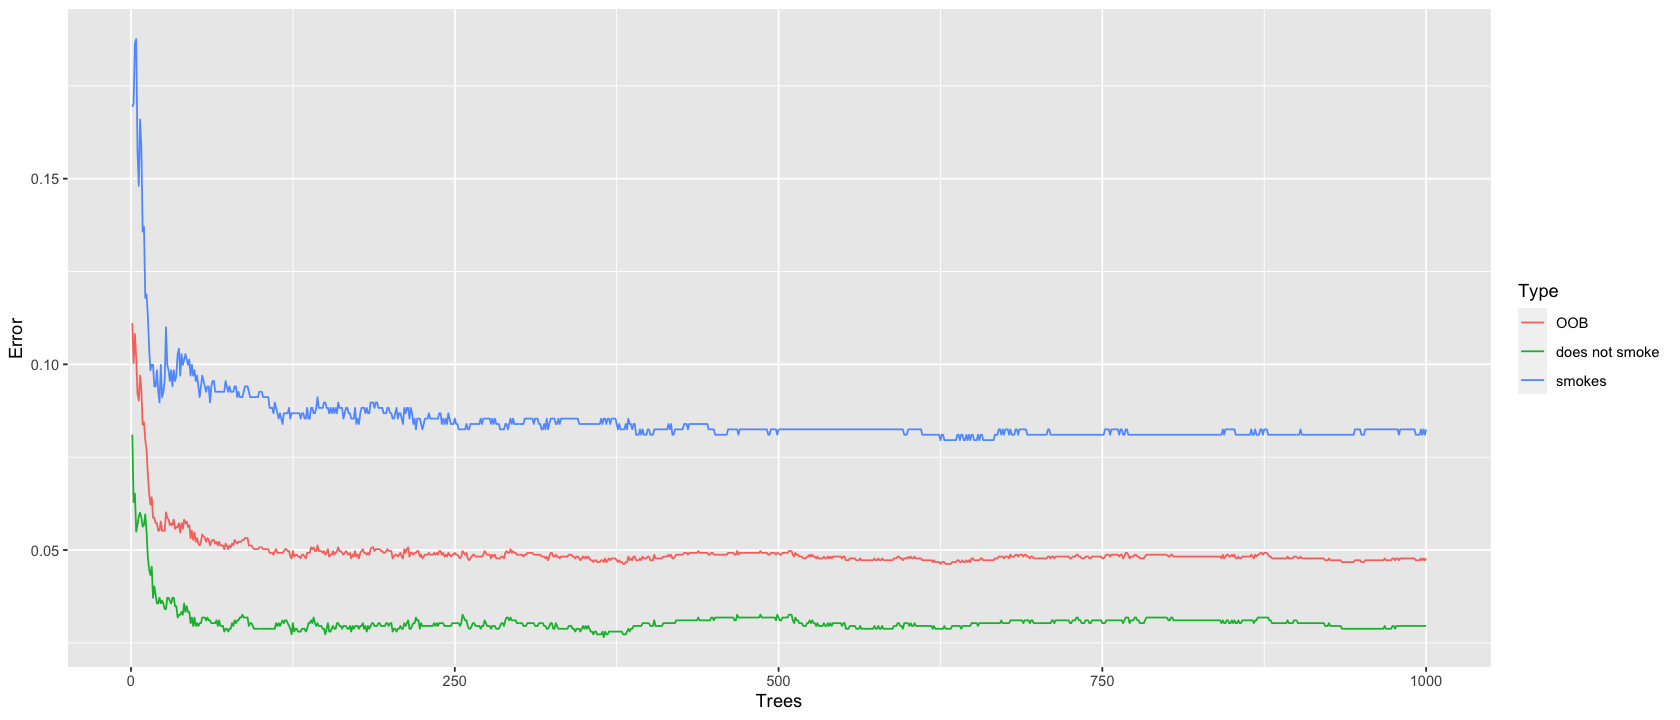

In [96]:
source('auxiliary/csmoke3.r')
rf.csmoke3
ggplot(data=oob.error.data, aes(x=Trees, y=Error)) + geom_line(aes(color=Type))
options(repr.plot.width=4.5, repr.plot.height=3)

In [95]:
tuneRF(csmoke3.data, csmoke3.data$csmoke3)

mtry = 4  OOB error = 0% 
Searching left ...
mtry = 2 	OOB error = 0.2% 
-Inf 0.05 
Searching right ...
mtry = 8 	OOB error = 0% 
NaN 0.05 


ERROR: Error in if (Improve > improve) {: пропущенное значение, а нужно TRUE/FALSE


[1] 0.08652412 0.05768274 0.04773744 0.04823471 0.04773744 0.04724018
 [7] 0.04773744 0.04674291 0.04773744 0.04624565 0.04972650 0.04773744
[13] 0.04773744 0.04674291 0.04624565 0.04873197 0.04823471

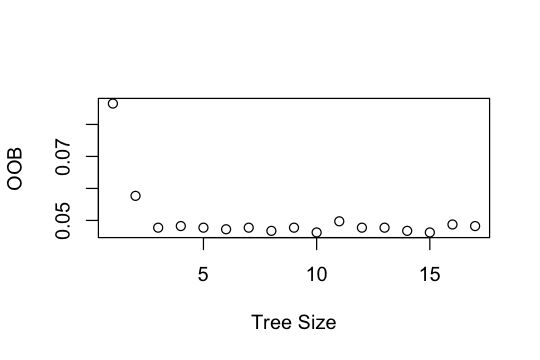

In [97]:
##now we need to make sure that I am considering the optimal number of variables at each internal node in the tree
oob.values<-vector(length=17)
for (i in 1:17) {
    temp.model<-randomForest(csmoke3.data$csmoke3~., data=csmoke3.data[-1], mtry=i, ntree=1000)
    oob.values[i]<-temp.model$err.rate[nrow(temp.model$err.rate),1]
}
oob.values
plot(oob.values,
     xlab = "Tree Size", 
     ylab = "OOB")
options(repr.plot.width=5, repr.plot.height=5)

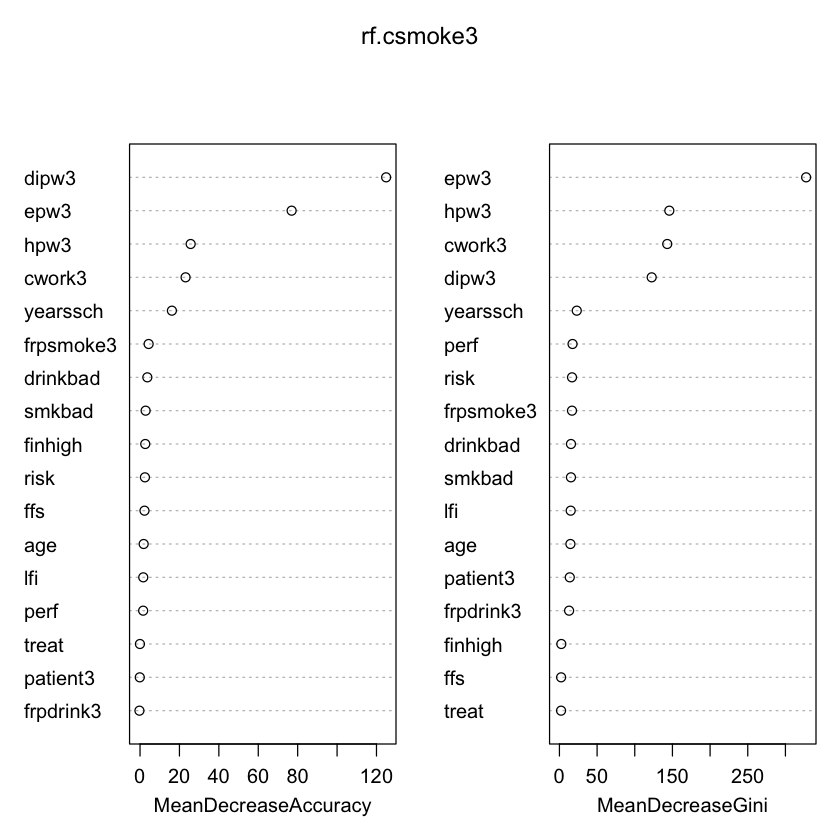

In [92]:
varImpPlot(rf.csmoke3)
options(repr.plot.width=14, repr.plot.height=6)

A performance instance
  'Area under the ROC curve'

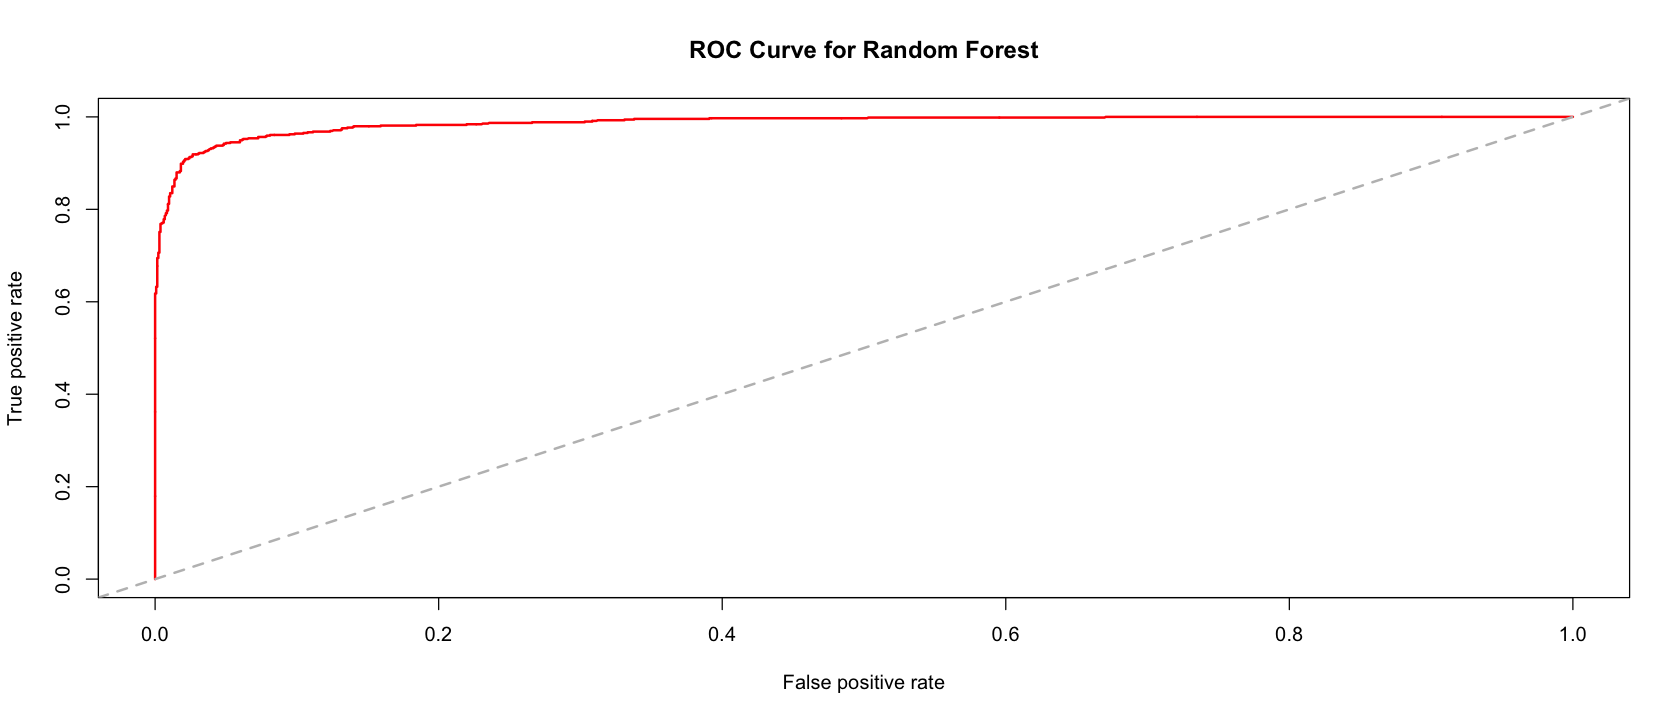

In [94]:
pred1=predict(rf.csmoke3,type = "prob")
perf = prediction(pred1[,2], csmoke3.data$csmoke3)
# 1. Area under curve
auc = performance(perf, "auc")
auc
# 2. True Positive and Negative Rate
pred3 = performance(perf, "tpr","fpr")
# 3. Plot the ROC curve
plot(pred3,main="ROC Curve for Random Forest",col=2,lwd=2)
abline(a=0,b=1,lwd=2,lty=2,col="gray")

## Discussion

The OOB error is often claimed to be an unbiased estimator for the true error rate (Breiman;
2001; Goldstein et al.; 2011; Zhang et al.; 2010). However, for two-class classification problems
it was reported that the OOB error overestimates the true prediction error (Bylander; 2002;
Mitchell; 2011).  It was thus recommended to
use the OOB error only as an upper bound for the true prediction error (Mitchell; 2011). However,
Mitchell (2011) considered only settings with completely balanced samples, sample sizes below 60
and two response classes, limiting the generality of the results.

The size of this subset is usually referred to as mtry. In practical applications, the most common
approach for choosing appropriate values for mtry is to select the value over a grid of plausible
values which yields the smallest OOB error (Oliveira et al.; 2012; Hassane et al.; 2008; Nicodemus
et al.; 2010). Also in works on RF methodology, the OOB error has frequently been used to choose
an appropriate value for mtry (Nicodemus and Malley; 2009; Kim et al.; 2006). In principle, other
procedures like (repeated) cross-validation may be applied for selecting an optimal value for mtry,
but the OOB error is usually the first choice for parameter tuning.

It is well
known that classification trees are greatly affected by class imbalance in the sense that trees that
were trained on unbalanced samples preferentially classify new observations into the class from
which most training observations come. 

With respect to data-dependent factors, the present studies identified the response class distribution of the original sample, the predictor number, the correlation between predictors as well
as their predictive ability as relevant factors that have an effect on the bias.

### Droncew - Drinks at least once a week round 2


Call:
 randomForest(formula = Y2.train$droncew2 ~ ., data = X2.train,      proximity = T, importance = T, mtry = 4) 
               Type of random forest: classification
                     Number of trees: 500
No. of variables tried at each split: 4

        OOB estimate of  error rate: 19.6%
Confusion matrix:
                           does not drink once a week drinks once a week
does not drink once a week                       1132                  3
drinks once a week                                273                  0
                           class.error
does not drink once a week 0.002643172
drinks once a week         1.000000000

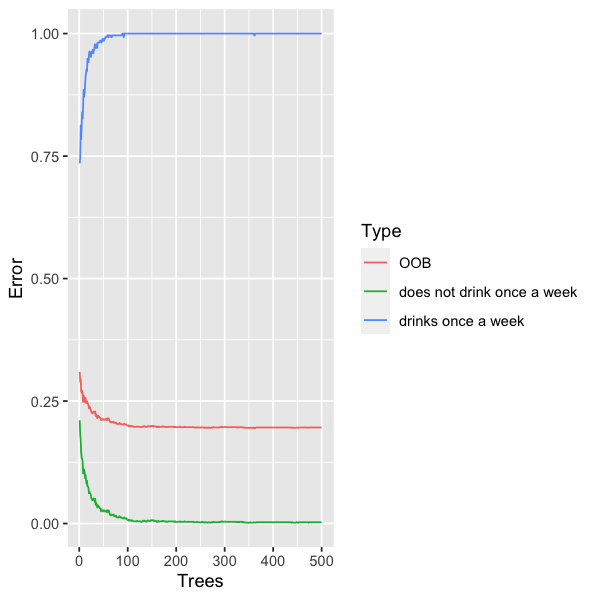

In [84]:
source('auxiliary/droncew2.r')
rf.droncew2
ggplot(data=oob.error.data, aes(x=Trees, y=Error)) + geom_line(aes(color=Type))
options(repr.plot.width=6, repr.plot.height=3.1)

[1] 0.1938920 0.1938920 0.1946023 0.1953125 0.1960227 0.1960227 0.1960227
 [8] 0.1981534 0.1974432 0.1974432

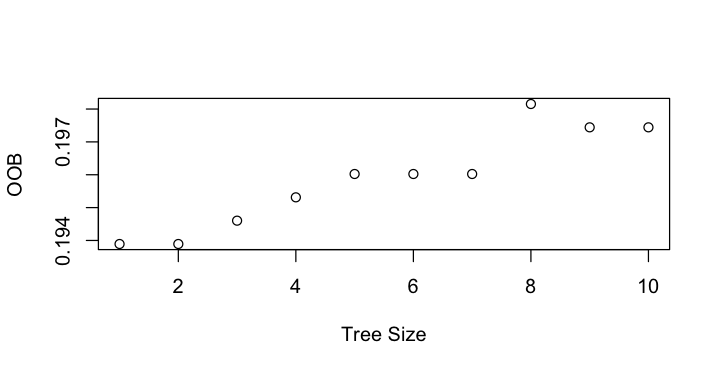

In [85]:
##now we need to make sure that I am considering the optimal number of variables at each internal node in the tree
oob.values<-vector(length=10)
for (i in 1:10) {
    temp.model<-randomForest(Y2.train$droncew2~., data=X2.train, mtry=i, ntree=500)
    oob.values[i]<-temp.model$err.rate[nrow(temp.model$err.rate),1]
}
oob.values
plot(oob.values,
     xlab = "Tree Size", 
     ylab = "OOB")
options(repr.plot.width=5, repr.plot.height=5)

### Drevd Drinks every day round 2 


Call:
 randomForest(formula = Y2.train$drevd2 ~ ., data = X2.train,      proximity = T, importance = T) 
               Type of random forest: classification
                     Number of trees: 500
No. of variables tried at each split: 3

        OOB estimate of  error rate: 1.85%
Confusion matrix:
                         does not drink every day drinks every day class.error
does not drink every day                     1382                0           0
drinks every day                               26                0           1

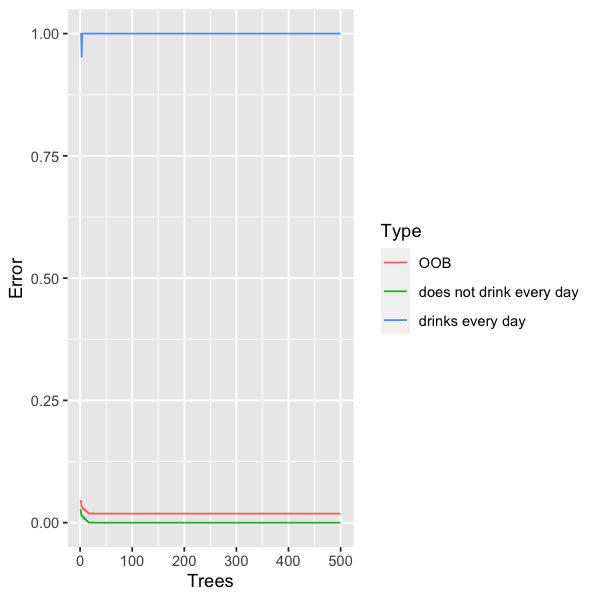

In [86]:
source('auxiliary/drevd2.r')
rf.drevd2
ggplot(data=oob.error.data, aes(x=Trees, y=Error)) + geom_line(aes(color=Type))
options(repr.plot.width=5, repr.plot.height=3.1)

##### Drinking frequency round 2

In [87]:
rf.drfr2<-randomForest(formula=Y2.train$drfr2~., data=X2.train,proximity=T, importance=T)
#ntree=500,mtry=3,
rf.drfr2



Call:
 randomForest(formula = Y2.train$drfr2 ~ ., data = X2.train, proximity = T,      importance = T) 
               Type of random forest: classification
                     Number of trees: 500
No. of variables tried at each split: 3

        OOB estimate of  error rate: 41.12%
Confusion matrix:
  1   2  3 4 class.error
1 3 242  2 0   0.9878543
2 3 823 11 0   0.0167264
3 1 301  3 0   0.9901639
4 1  18  0 0   1.0000000

mtry = 3  OOB error = 44.6% 
Searching left ...
mtry = 2 	OOB error = 42.9% 
0.03821656 0.05 
Searching right ...
mtry = 6 	OOB error = 44.46% 
0.003184713 0.05 


,mtry,OOBError
2.OOB,2,0.4289773
3.OOB,3,0.4460227
6.OOB,6,0.4446023


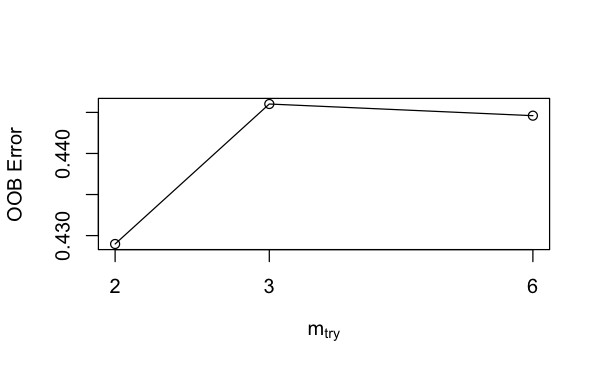

In [88]:
tuneRF(X2.train, Y2.train$drfr2)